### Libraries

In [1]:
import torch
import pandas as pd
# import torchvision
import numpy as np
%matplotlib inline
import skimage.io as io
import matplotlib.pyplot as plt
import csv
from tqdm.auto import tqdm
from loader import FlickrDataset,preprocessing_transforms,get_data_loader,denormalize,Padding
from vocab import Vocabulary
from model import EncoderCNN,DecoderRNN,get_acc
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from torch.utils.data import DataLoader


In [2]:
# import sys
# del sys.modules["model"]

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Building Vocabulary and Loading our data


In [4]:
vocab = Vocabulary()

In [5]:
vocab.build_vocab()

In [5]:
vocab.save_vocab()

In [6]:
train_data = FlickrDataset('flickr30k_processed/train.csv', vocab = vocab,images_folder='flickr30k_processed/images', transform=preprocessing_transforms())

In [7]:
train_loader = DataLoader(dataset=train_data
                          , batch_size= 32,
                          num_workers=3,pin_memory=True, shuffle=True,  collate_fn= Padding(pad_idx=0,batch_first=True))



/Users/nadia/opt/anaconda3/envs/adlproject/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [10]:
train_loader = get_data_loader(train_data, batch_size = 32,pad_index=0)

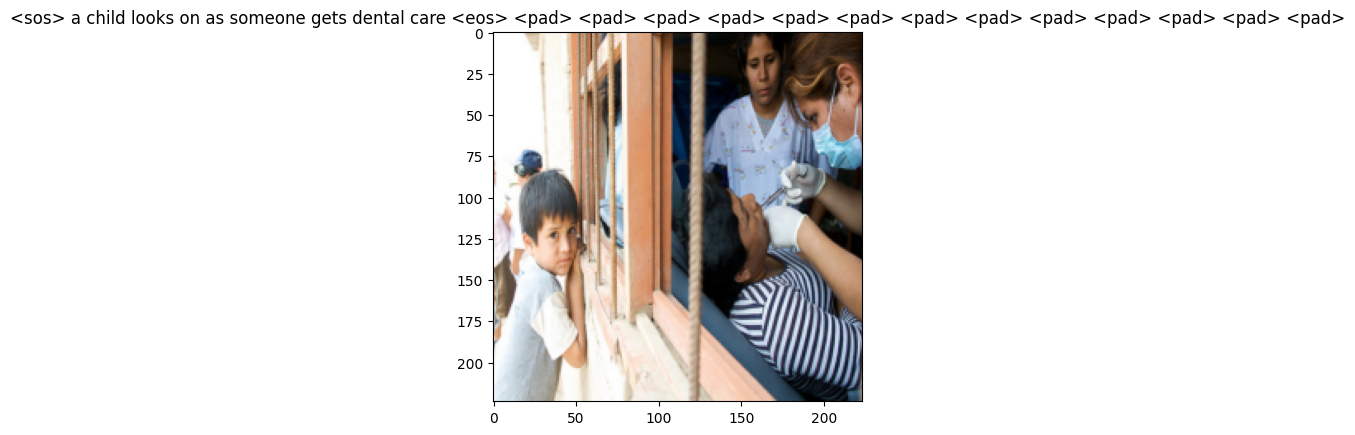

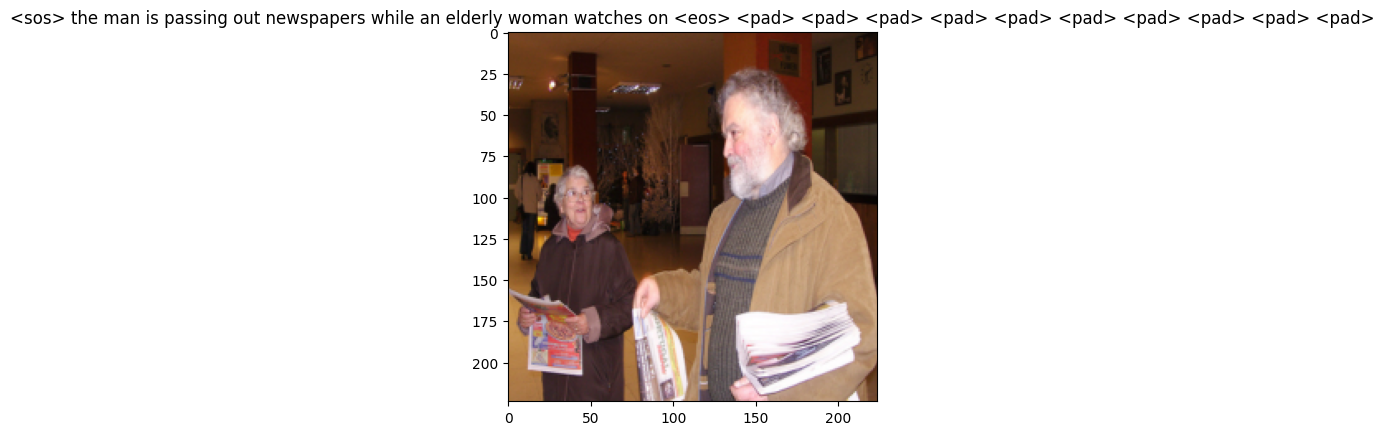

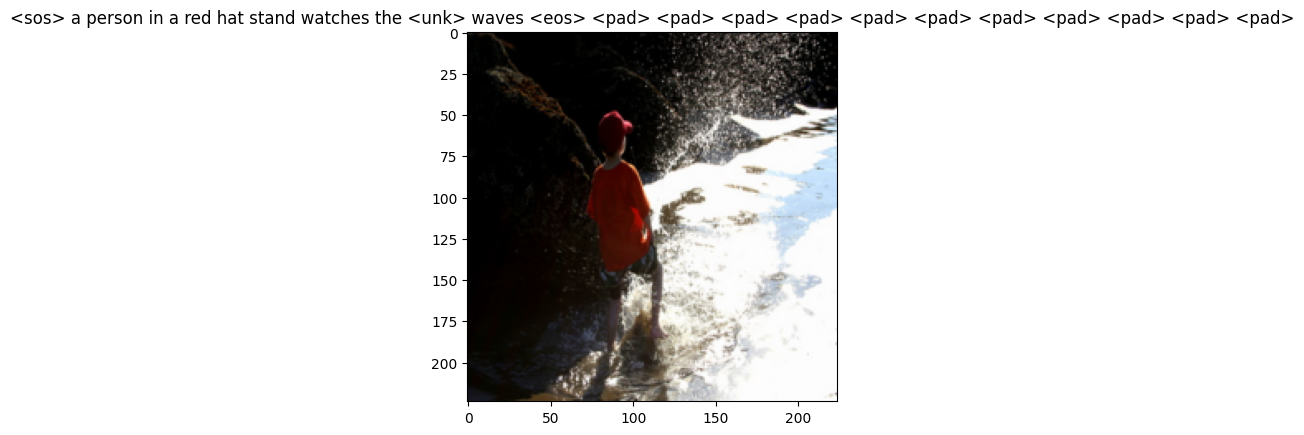

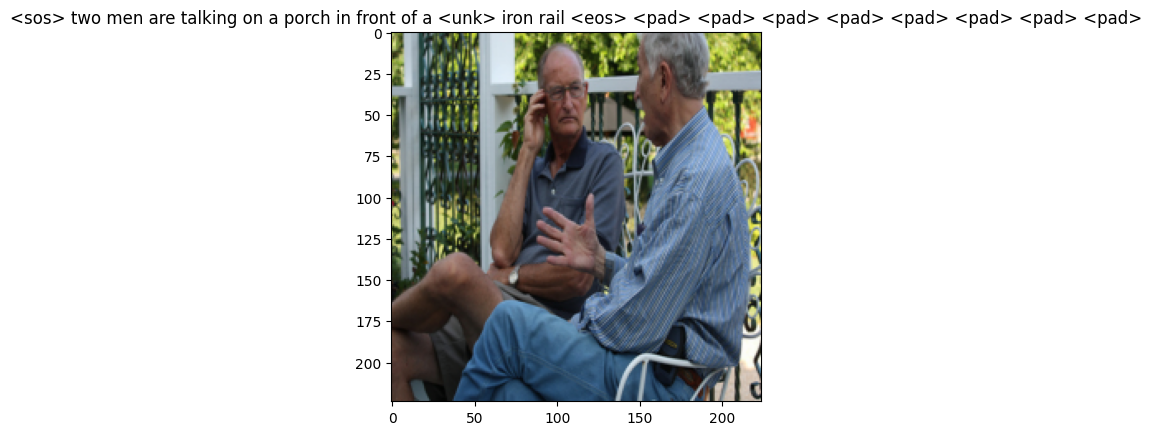

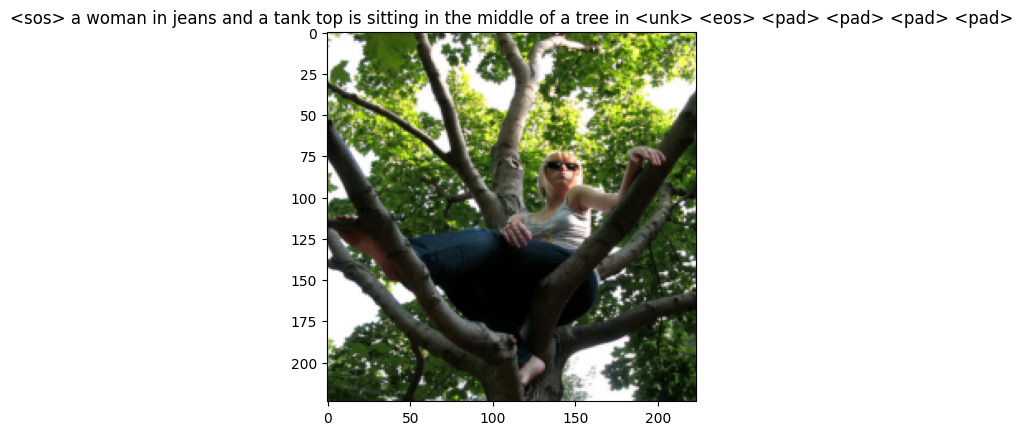

In [12]:
#looking at first 5 images & captions
i= 0
x, y = next(iter(train_loader))
for image, caption in zip(x, y):
    image = denormalize(image)
    caption = [vocab.idx_to_word(int(word_id)) for word_id in caption]
    caption = ' '.join(word for word in caption)
    plt.imshow(image)
    plt.title(caption)
    plt.show()
    plt.pause(1)
    i+=1
    if i ==5:
        break

### Model

In [13]:
encoder = EncoderCNN(image_emb_dim=512,device = device).to(device)
emb_layer = torch.nn.Embedding(num_embeddings = 5000, embedding_dim=512,padding_idx=0).to(device)

Encoder:
                        Encoder dimension: 512


In [14]:
decoder = DecoderRNN(image_emb_dim = 512,word_emb_dim=512,hidden_dim= 1024,num_layers= 1,vocab_size=5000,device =device).to(device)

Decoder:
                        Encoder Size:  512,
                        Embedding Size: 512,
                        LSTM Capacity: 1024,
                        Number of layers: 1,
                        Vocabulary Size: 5000,
                        


In [15]:
criterion = torch.nn.CrossEntropyLoss()


In [16]:
parameters = list(decoder.parameters()) + list(emb_layer.parameters()) + list(decoder.parameters())
optimizer = torch.optim.Adam(params=parameters, lr= 0.001)

/Users/nadia/opt/anaconda3/envs/adlproject/lib/python3.10/site-packages/torch/_compile.py:24: UserWarning: optimizer contains a parameter group with duplicate parameters; in future, this will cause an error; see github.com/pytorch/pytorch/issues/40967 for more information
  return torch._dynamo.disable(fn, recursive)(*args, **kwargs)


### Training my model

In [27]:
epochs = 5
for epoch in range(0,epochs):
    print(epoch)
    for b in (train_loader):
        print(b[0])

0


TypeError: DecoderRNN.forward() takes 3 positional arguments but 5 were given

In [28]:
for  in (train_loader):
    print(b)

In [39]:
for i, batch in enumerate(train_loader):
    print(i)


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa477222560>
Traceback (most recent call last):
  File "/Users/nadia/opt/anaconda3/envs/adlproject/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/Users/nadia/opt/anaconda3/envs/adlproject/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1436, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


KeyboardInterrupt: 

In [48]:
 for epoch in range(0,1):
    print(epoch)

0
